In [206]:
import pandas as pd

df = pd.read_excel("data/appliedAI_Use Case Library - Risk Class_TUM.ai.xlsx", index_col=None, header=2)
df_gen = pd.read_csv("data/generated_ideas (2).csv")

In [207]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/auto/brno2/home/xstary1/brno6/tumai-makeathon22


In [208]:
df["risk"] = df["Is the AI System high-risk or low risk?"]
df["name"]  = df["Use case name EN"]
df["desc"] = df["Description"]
df["bus_ch"] = df["Business Challenge"] 
df["system"] = df["AI System"]

df = df.fillna("")


In [209]:
df_gen["description"] = df_gen["description"].apply(lambda x: x.strip())

In [210]:
df_gen["tags"].unique()

array(['biometric identification', 'categorisation of people',
       'management of critical infrastructure',
       'operation of critical infrastructure',
       'education test evaluation', 'vocational test evaluation',
       'worker evaluation', 'work evaluationworkers management',
       'work management', 'human resources services',
       'access to self-employment', 'manage access to venues',
       'manage access from the government',
       'manage access to public goods', 'credit scoring',
       'police suspects', 'help with migration legal process',
       'help with asylum legal process', 'border control management',
       'legal documents generation', 'counting votes', 'counting ballets',
       'decision process in law facilities', 'democratic processes'],
      dtype=object)

In [211]:
df = df[df["risk"] != "It is unclear"]
len(df)

115

In [212]:
df.head()

,Use Case ID,Use Case Name,Use case name EN,Beschreibung,Description,Geschäftsproblem,Business Challenge,KI Lösung,AI System,Links,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,risk,name,desc,bus_ch,system
0,1,Optimierte Stellenangebote,Optimised job offers,Ein zentrales Thema im Einstellungsprozess ist...,A central topic in the setting process is to w...,"Viele Unternehmen tun sich schwer, die richtig...",Many companies find it difficult to win the ri...,Zur Analyse und Optimierung seines Recruiting-...,To analyze and optimize its recruiting materia...,https://www.foundationsofai.com/\n https://tex...,...,,,,,,low-risk,Optimised job offers,A central topic in the setting process is to w...,Many companies find it difficult to win the ri...,To analyze and optimize its recruiting materia...
1,2,Analyse eines Videointerviews,Analysis of a video interview,Während des Rekrutierungsprozesses werden nich...,"During the recruitment process, not only the h...",Das Kundenbetreuungskonzept ist ein zentrales ...,The customer care concept is a central element...,HAPPYCAR hat die KI-Lösung von Retorio zur Ana...,Happycar has integrated Retorio's AI solution ...,https://www.foundationsofai.com/\n https://f.h...,...,,,,,,high-risk,Analysis of a video interview,"During the recruitment process, not only the h...",The customer care concept is a central element...,Happycar has integrated Retorio's AI solution ...
2,3,Vorhersage von Personalfluktuation,Predicting staff turnover,Bestehende Maßnahmen zur Steigerung der Mitarb...,Existing measures to increase employee loyalty...,Die Bindung von Top-Talenten ist ein wichtiger...,The binding of top talents is an important asp...,IBM hat eine KI-Lösung zur Vorhersage von Pers...,IBM has developed a AI solution to predict per...,https://www.foundationsofai.com/\n https://www...,...,,,,,,high-risk,Predicting staff turnover,Existing measures to increase employee loyalty...,The binding of top talents is an important asp...,IBM has developed a AI solution to predict per...
3,4,Leistungsüberwachung / Beobachtung des Mitarbe...,Performance monitoring / observation of employ...,"Engagement-Monitoring-Tools, die auf KI basier...",Engagement monitoring tools based on AI can ex...,Die Bewertung des Mitarbeiterengagements ist i...,The assessment of employee engagement is a cha...,Die KI-Lösung von KeenCorp analysiert kontinui...,The Ki solution from Keencorp continuously ana...,https://www.smartdatacollective.com/ai-driven-...,...,,,,,,high-risk,Performance monitoring / observation of employ...,Engagement monitoring tools based on AI can ex...,The assessment of employee engagement is a cha...,The Ki solution from Keencorp continuously ana...
4,5,Kandidatensuche,Search for candidates,Die am besten geeigneten Kandidat:innen zu fin...,The most suitable candidate: finding inside is...,"Poshmark, ein führendes E-Commerce-Unternehmen...","Poshmark, a leading e-commerce company, wanted...",Poshmark arbeitete mit einem KI-basierten Star...,Poshmark worked with a AI-based startup to str...,https://www.forbes.com/sites/falonfatemi/2019/...,...,,,,,,high-risk,Search for candidates,The most suitable candidate: finding inside is...,"Poshmark, a leading e-commerce company, wanted...",Poshmark worked with a AI-based startup to str...


In [213]:
df = df[df["risk"] != ""]


In [214]:
df["risk"].value_counts()


low-risk     84
high-risk    14
Name: risk, dtype: int64

In [215]:
len(df)
df = df.reset_index()

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['risk'],
                                                    stratify=df['risk'], 
                                                    test_size=0.60,
                                                   random_state=40)

In [217]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences we want to encode. Example:


train_gen = df_gen["description"].to_list() + X_train[X_train["risk"] == "low-risk"]["desc"].to_list()
sentences_gen = train_gen

sentences_cross = df["desc"].to_list()
sentences_train = X_train["desc"].to_list()
sentences_test = X_test["desc"].to_list() + X_train[X_train["risk"] == "high-risk"]["desc"].to_list()


#Sentences are encoded by calling model.encode()

embeddings_gen = model.encode(sentences_gen)

embeddings_train = model.encode(sentences_train)
embeddings_test = model.encode(sentences_test)
embeddings_cross = model.encode(sentences_cross)

In [218]:
len(df),len(embeddings_cross)

(98, 98)

In [219]:
df.index

RangeIndex(start=0, stop=98, step=1)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


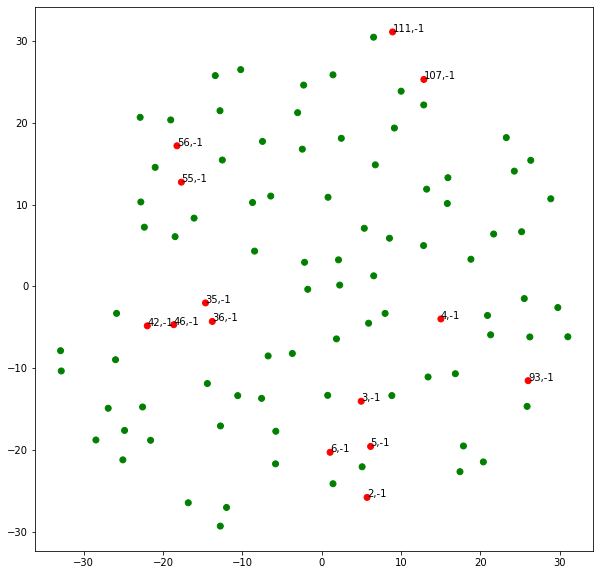

In [220]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

tsne = make_pipeline(StandardScaler(),TSNE(perplexity=30, metric="cosine"))
dbscan = make_pipeline(StandardScaler(), DBSCAN(eps=0.4, min_samples=3, metric="cosine"))


clusters = dbscan.fit_predict(embeddings_cross)
res = tsne.fit_transform(embeddings_cross)

plt.figure(figsize=(10,10))
plt.scatter(x=res[:,0], y=res[:, 1], c=df["risk"].replace({"low-risk": "green", "high-risk": "red"}))
for index, row in df[df["risk"]=="high-risk"].iterrows():
    plt.annotate(str(row[1])+ "," + str(clusters[0]), res[index])
#     print(row[1])
    

In [221]:
res.shape

(98, 2)

In [222]:
pd.Series(clusters).value_counts()

-1    83
 0     6
 1     3
 2     3
 3     3
dtype: int64

In [223]:
embeddings_train.shape

(39, 384)

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
knn = KNeighborsClassifier(n_neighbors=3)

In [226]:
train_gen_y = df_gen["tags"].to_list() + ["low-risk" for _ in range(len(X_train[X_train["risk"] == "low-risk"]["desc"]))]

knn.fit(embeddings_gen, train_gen_y)

KNeighborsClassifier(n_neighbors=3)

In [227]:
# pred = knn.predict(embeddings_test)#, X_test["risk"])

In [228]:
from sklearn.metrics import plot_confusion_matrix

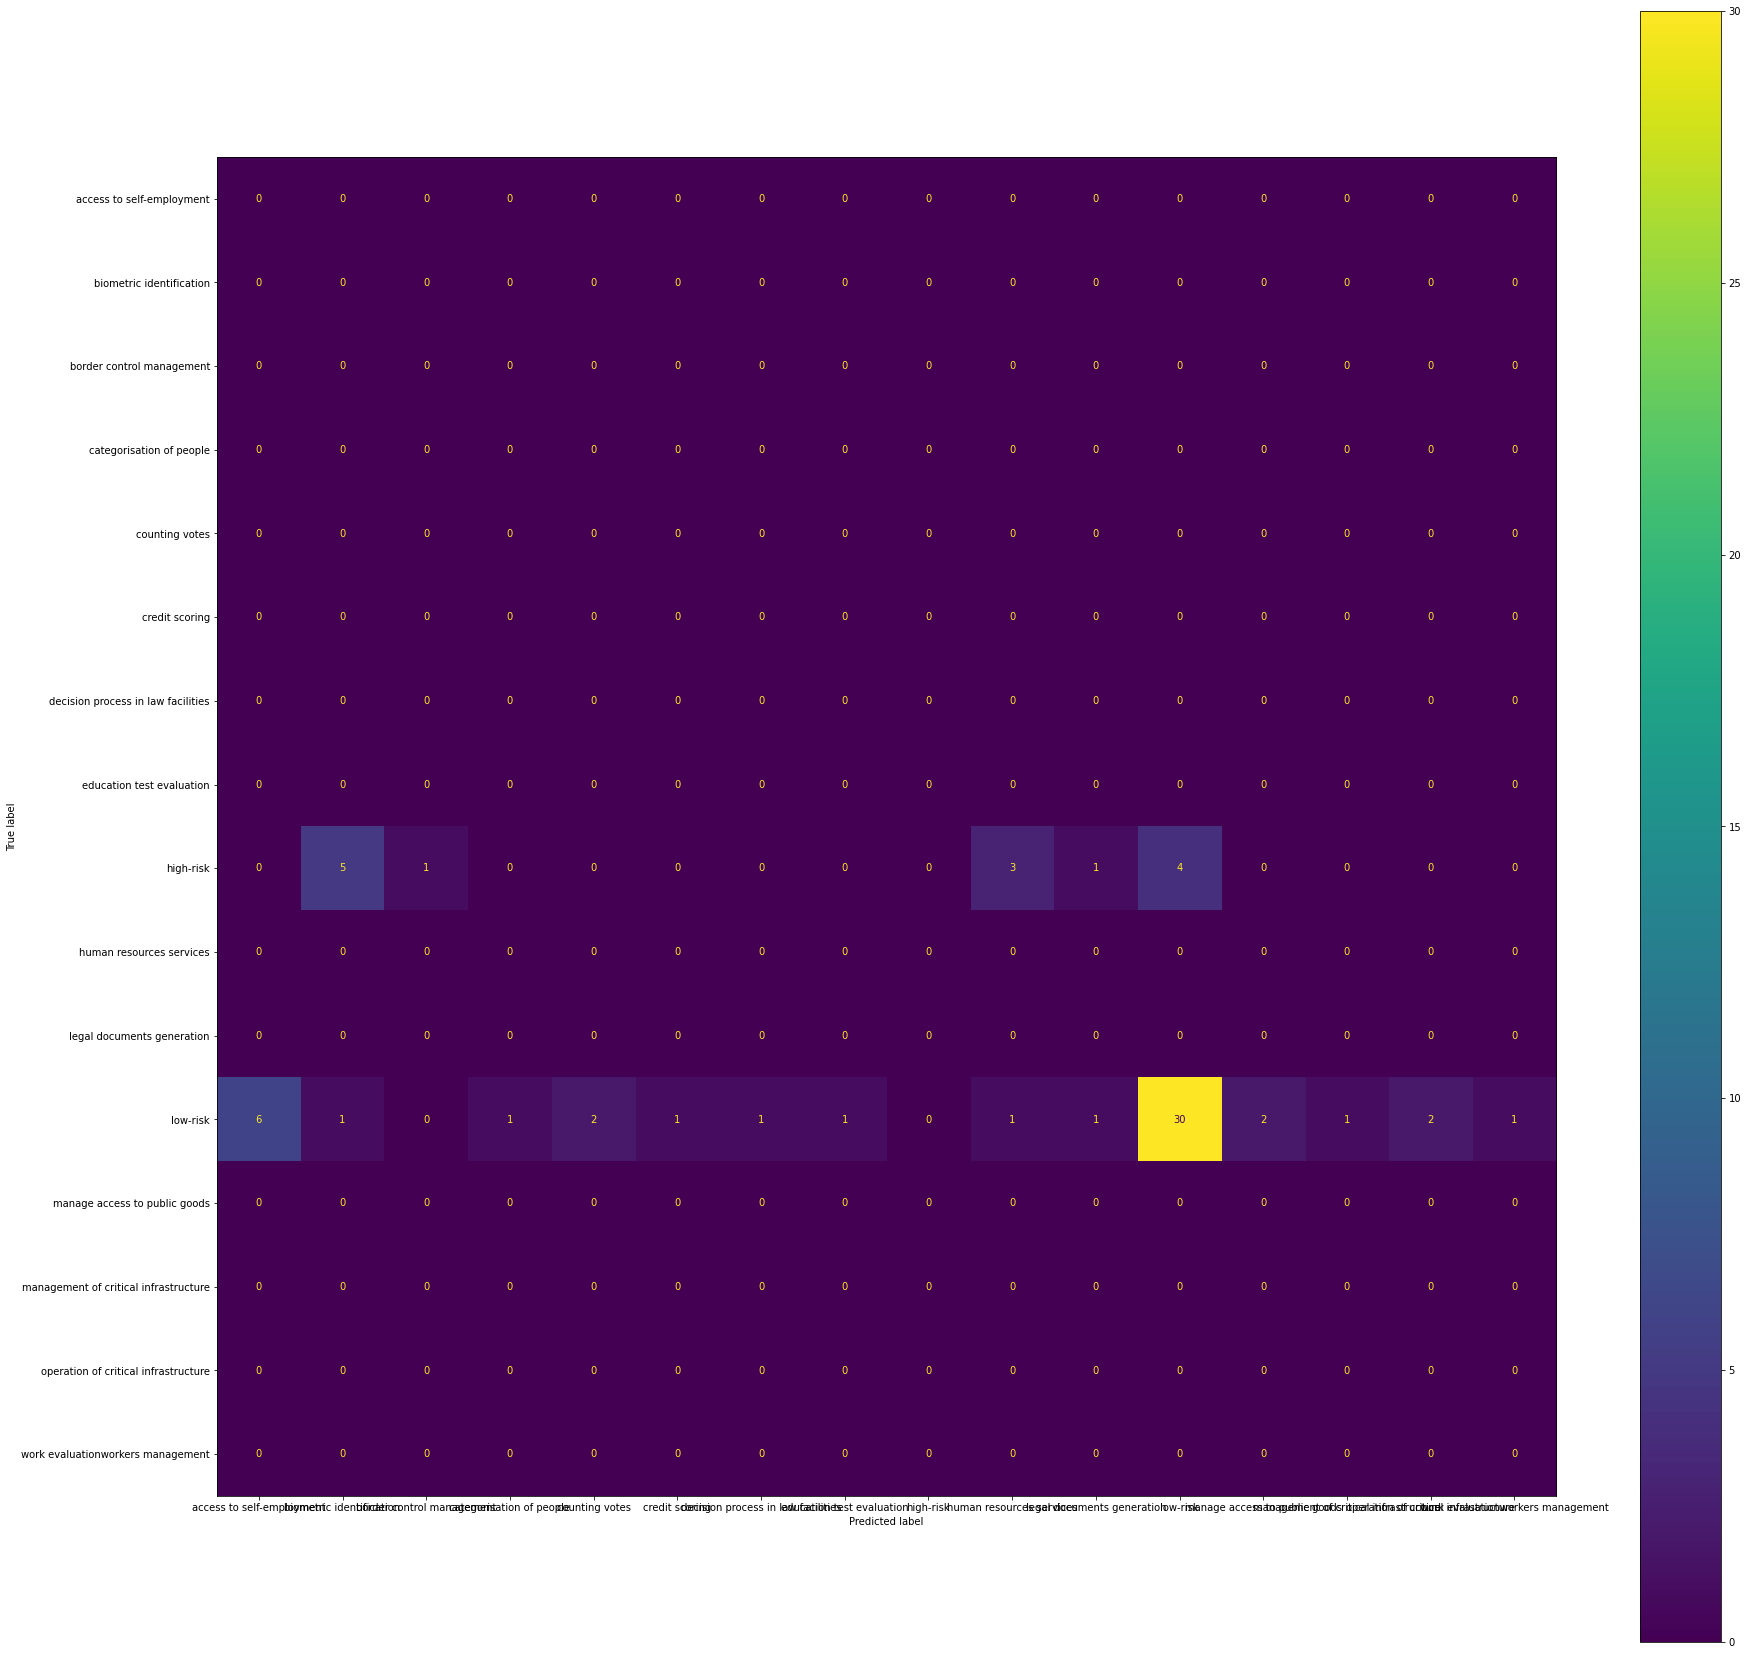

In [229]:
fig,ax = plt.subplots(figsize=(30,30))
plot_confusion_matrix(knn, embeddings_test, X_test["risk"].to_list() + ["high-risk" for _ in range(len(X_train[X_train["risk"] == "high-risk"]["desc"]))], ax=ax)

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, get_scorer, make_scorer
scs = cross_val_score(knn, embeddings_cross, df["risk"], scoring=make_scorer(balanced_accuracy_score))
scs.mean()

0.5705882352941176